# USA Houses Analysis

Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

A House Rocket deveria fazer uma reforma para aumentar o preço da venda? 

Quais seriam as sugestões de mudanças? 

Qual o incremento no preço dado por cada opção de reforma?

## Importing Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../raw_data/kc_house_data.csv', parse_dates =['date'])

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Features Selection

### Filter Methods

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.duplicated().sum()

0

Let's check price feature distribution.

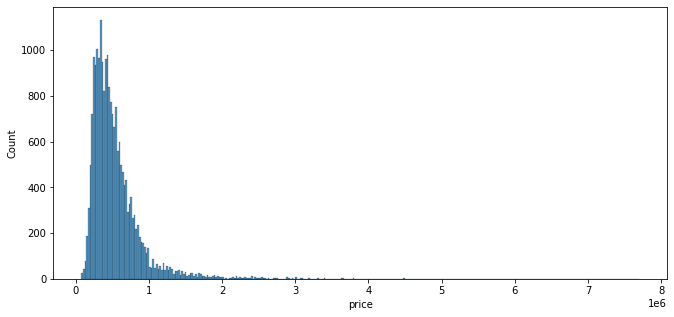

In [7]:
fig = plt.figure(figsize=(11,5))
fig = sns.histplot(df['price']);

We clearly see that price is not a normal distribution and it is skewed to the right. Let's keep that way and check other features.

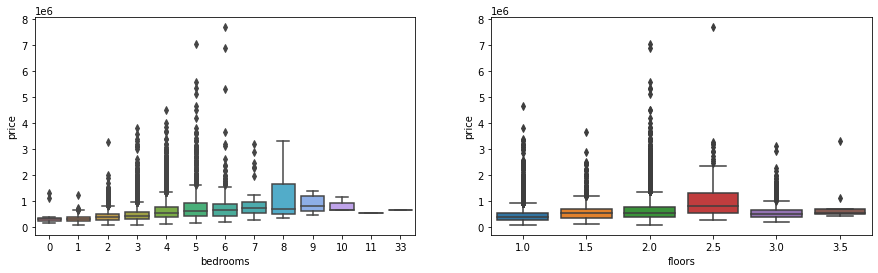

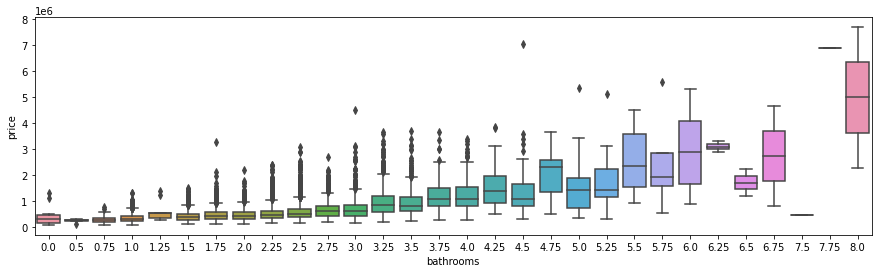

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='floors', y='price', data=df)

plt.figure(figsize=(15,4))
plt.subplot(1,1,1)
sns.boxplot(x='bathrooms', y='price', data=df);

We see some houses with 0 bathrooms and 0 bedrooms, and also some houses with 11 bedrooms and 33 bedrooms. At first, we are gonna drop the houses with 0 bathrooms and 0 bedrooms, because they doesn't make sense, who's gonna buy a house without bedroom or bathroom, right? 

In [9]:
df = df[df.bedrooms != 0]

In [10]:
df = df[df.bathrooms != 0]

Let's check how many houses have 11 and 33 bedrooms.

In [11]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We can notice there are only 1 house with 33 bedrooms and 1 house with 11 bedrooms. These are outliers that could decrease linear model performance. However, when it comes to  tree based models, they are robust to outliers, so we will keep them.

#### Pearson's Correlation

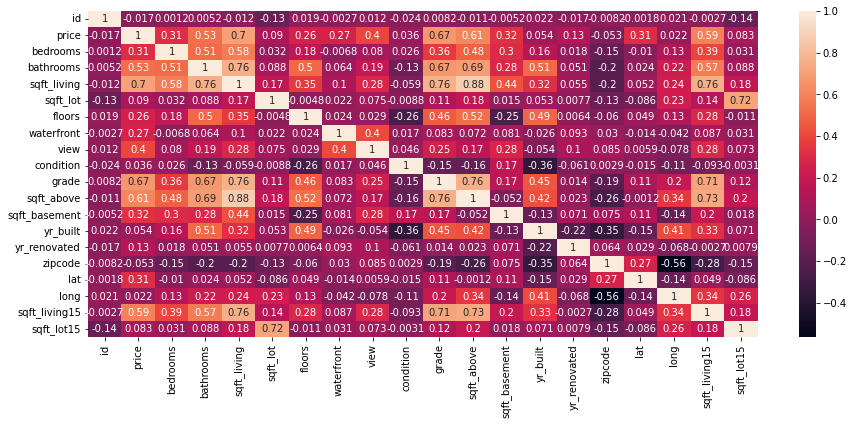

In [12]:
import seaborn as sns

dfcorr = df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(dfcorr, annot = True)
plt.show()

In [13]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701909
grade            0.667922
sqft_above       0.605371
sqft_living15    0.585247
bathrooms        0.525905
view             0.397318
sqft_basement    0.323776
bedrooms         0.308794
lat              0.306777
waterfront       0.266437
floors           0.256814
yr_renovated     0.126415
sqft_lot         0.089882
sqft_lot15       0.082837
yr_built         0.053984
condition        0.036025
long             0.022092
id              -0.016737
zipcode         -0.053437
Name: price, dtype: float64

Let's drop zipcode, id and date due to low correlation with price feature. And also let's encode categorical features.

In [14]:
novo_df = df.drop(['zipcode','id','date', 'waterfront', 'view', 'condition', 'grade'], axis=1)

In [15]:
df_cat = df[['waterfront', 'view', 'condition', 'grade']]
df_cat

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


In [16]:
df_cat_dum = pd.get_dummies(df_cat,columns=['waterfront', 'view', 'condition', 'grade'],drop_first=True)
df_cat_dum

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21609,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21610,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
21611,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


**drop_first=True** is used to avoid multicolinearity in categorical features, thats why we dropped the first collum for each categorical feature.

In [17]:
df_concat=pd.concat([novo_df,df_cat_dum],axis=1)
df_concat

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,...,0,0,0,0,1,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,...,0,0,0,0,1,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,...,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,...,0,0,0,0,1,0,0,0,0,0


#### P-Value

In [18]:
df_concat_no_price = df_concat.copy()
df_concat_no_price = df_concat_no_price.drop(['price'], axis=1)

In [19]:
y = df_concat['price']

In [20]:
import statsmodels.api as sm
ols = sm.OLS(y, sm.add_constant(df_concat_no_price)).fit()
ols.summary()

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1850.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:44:34   Log-Likelihood:            -2.9337e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21565   BIC:                         5.871e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.599e+07   1.53e+06    -23.511      0.000    -3.9e+07    -3.3e+07
bedrooms      -1.841e+04   1852.269     -9.937      0.000    -2.2e+04   -1.48e+04
bathrooms      4.416e+04   3138.868     14.069      0.000     3.8e+04    5.03e+04
sqft_living      86.3388      2.220     38.897      0.000      81.988      90.690
sqft_lot          0.1285      0.046      2.807      0.005       0.039       0.218
floors          1.98e+04   3484.211      5.684      0.000     1.3e+04    2.66e+04
sqft_above       45.3458      2.234     20.294      0.000      40.966      49.725
sqft_basement    40.9933      2.537     16.159      0.000      36.021      45.966
yr_built      -1995.6262     70.572    -28.278      0.000   -2133.952   -1857.300
yr_renovated     32.0620      3.510      9.135      0.000      25.183      38.941
lat            5.746e+05      1e+04     57.263      0.000    5.55e+05    5.94e+05
long          -1.039e+05   1.14e+04     -9.092      0.000   -1.26e+05   -8.15e+04
sqft_living15    32.5697      3.315      9.826      0.000      26.073      39.066
sqft_lot15       -0.3941      0.070     -5.629      0.000      -0.531      -0.257
waterfront_1   5.202e+05   1.88e+04     27.629      0.000    4.83e+05    5.57e+05
view_1         1.123e+05   1.08e+04     10.401      0.000    9.11e+04    1.33e+05
view_2         6.324e+04   6560.535      9.640      0.000    5.04e+04    7.61e+04
view_3         1.223e+05   9002.614     13.582      0.000    1.05e+05     1.4e+05
view_4         2.482e+05   1.38e+04     17.955      0.000    2.21e+05    2.75e+05
condition_2    5.092e+04   3.87e+04      1.315      0.189    -2.5e+04    1.27e+05
condition_3    5.673e+04    3.6e+04      1.575      0.115   -1.39e+04    1.27e+05
condition_4    9.567e+04    3.6e+04      2.655      0.008     2.5e+04    1.66e+05
condition_5    1.346e+05   3.62e+04      3.713      0.000    6.35e+04    2.06e+05
grade_4       -1.701e+05   1.96e+05     -0.869      0.385   -5.54e+05    2.14e+05
grade_5       -1.869e+05   1.93e+05     -0.971      0.332   -5.64e+05    1.91e+05
grade_6       -1.673e+05   1.92e+05     -0.870      0.384   -5.44e+05    2.09e+05
grade_7       -1.217e+05   1.92e+05     -0.633      0.527   -4.99e+05    2.55e+05
grade_8       -6.001e+04   1.92e+05     -0.312      0.755   -4.37e+05    3.17e+05
grade_9        5.931e+04   1.92e+05      0.308      0.758   -3.18e+05    4.36e+05
grade_10       2.232e+05   1.92e+05      1.159      0.246   -1.54e+05       6e+05
grade_11       4.705e+05   1.93e+05      2.441      0.015    9.27e+04    8.48e+05
grade_12       9.287e+05   1.94e+05      4.793      0.000    5.49e+05    1.31e+06
grade_13        2.12e+06      2e+05     10.583      0.000    1.73e+06    2.51e+06
==============================================================================
Omnibus:                    14713.313   Durbin-Watso

In [21]:
df_concat_no_price = df_concat_no_price.drop(['grade_9'],axis=1)

In [22]:
ols = sm.OLS(y, sm.add_constant(df_concat_no_price)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1912.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:44:34   Log-Likelihood:            -2.9337e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21566   BIC:                         5.870e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.594e+07   1.52e+06    -23.590      0.000   -3.89e+07    -3.3e+07
bedrooms       -1.84e+04   1852.123     -9.934      0.000    -2.2e+04   -1.48e+04
bathrooms      4.416e+04   3138.797     14.070      0.000     3.8e+04    5.03e+04
sqft_living      86.3468      2.219     38.904      0.000      81.996      90.697
sqft_lot          0.1286      0.046      2.808      0.005       0.039       0.218
floors          1.98e+04   3484.130      5.683      0.000     1.3e+04    2.66e+04
sqft_above       45.3556      2.234     20.301      0.000      40.977      49.735
sqft_basement    40.9909      2.537     16.159      0.000      36.019      45.963
yr_built      -1995.1602     70.554    -28.278      0.000   -2133.452   -1856.869
yr_renovated     32.0672      3.510      9.137      0.000      25.188      38.946
lat            5.747e+05      1e+04     57.289      0.000    5.55e+05    5.94e+05
long           -1.04e+05   1.14e+04     -9.101      0.000   -1.26e+05   -8.16e+04
sqft_living15    32.5789      3.314      9.830      0.000      26.083      39.075
sqft_lot15       -0.3941      0.070     -5.629      0.000      -0.531      -0.257
waterfront_1   5.202e+05   1.88e+04     27.630      0.000    4.83e+05    5.57e+05
view_1         1.123e+05   1.08e+04     10.401      0.000    9.11e+04    1.33e+05
view_2         6.325e+04   6560.355      9.641      0.000    5.04e+04    7.61e+04
view_3         1.223e+05   9002.394     13.583      0.000    1.05e+05     1.4e+05
view_4         2.482e+05   1.38e+04     17.956      0.000    2.21e+05    2.75e+05
condition_2    5.093e+04   3.87e+04      1.315      0.188    -2.5e+04    1.27e+05
condition_3    5.673e+04    3.6e+04      1.575      0.115   -1.39e+04    1.27e+05
condition_4    9.568e+04    3.6e+04      2.655      0.008    2.51e+04    1.66e+05
condition_5    1.346e+05   3.62e+04      3.713      0.000    6.35e+04    2.06e+05
grade_4       -2.293e+05   3.78e+04     -6.063      0.000   -3.03e+05   -1.55e+05
grade_5       -2.461e+05   1.43e+04    -17.202      0.000   -2.74e+05   -2.18e+05
grade_6       -2.266e+05   7753.872    -29.218      0.000   -2.42e+05   -2.11e+05
grade_7        -1.81e+05   5690.385    -31.803      0.000   -1.92e+05    -1.7e+05
grade_8       -1.193e+05   4948.059    -24.105      0.000   -1.29e+05    -1.1e+05
grade_10       1.639e+05   7078.768     23.150      0.000     1.5e+05    1.78e+05
grade_11       4.112e+05   1.12e+04     36.802      0.000    3.89e+05    4.33e+05
grade_12       8.693e+05    2.2e+04     39.591      0.000    8.26e+05    9.12e+05
grade_13        2.06e+06   5.49e+04     37.554      0.000    1.95e+06    2.17e+06
==============================================================================
Omnibus:                    14712.730   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [23]:
df_concat_no_price = df_concat_no_price.drop(['condition_2'],axis=1)

In [24]:
ols = sm.OLS(y, sm.add_constant(df_concat_no_price)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1978.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:44:34   Log-Likelihood:            -2.9337e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21567   BIC:                         5.870e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.588e+07   1.52e+06    -23.561      0.000   -3.89e+07   -3.29e+07
bedrooms      -1.839e+04   1852.135     -9.928      0.000    -2.2e+04   -1.48e+04
bathrooms      4.416e+04   3138.847     14.068      0.000     3.8e+04    5.03e+04
sqft_living      86.3636      2.219     38.912      0.000      82.013      90.714
sqft_lot          0.1285      0.046      2.806      0.005       0.039       0.218
floors         1.977e+04   3484.116      5.675      0.000    1.29e+04    2.66e+04
sqft_above       45.3486      2.234     20.298      0.000      40.969      49.728
sqft_basement    41.0151      2.537     16.168      0.000      36.043      45.987
yr_built      -1994.0490     70.550    -28.264      0.000   -2132.333   -1855.765
yr_renovated     32.0810      3.510      9.141      0.000      25.202      38.960
lat            5.745e+05      1e+04     57.277      0.000    5.55e+05    5.94e+05
long          -1.039e+05   1.14e+04     -9.092      0.000   -1.26e+05   -8.15e+04
sqft_living15    32.4613      3.313      9.798      0.000      25.967      38.955
sqft_lot15       -0.3932      0.070     -5.616      0.000      -0.530      -0.256
waterfront_1   5.202e+05   1.88e+04     27.630      0.000    4.83e+05    5.57e+05
view_1         1.122e+05   1.08e+04     10.394      0.000     9.1e+04    1.33e+05
view_2         6.328e+04   6560.412      9.646      0.000    5.04e+04    7.61e+04
view_3         1.223e+05   9002.511     13.586      0.000    1.05e+05     1.4e+05
view_4         2.479e+05   1.38e+04     17.939      0.000    2.21e+05    2.75e+05
condition_3    1.306e+04    1.4e+04      0.936      0.350   -1.43e+04    4.04e+04
condition_4    5.202e+04    1.4e+04      3.713      0.000    2.46e+04    7.95e+04
condition_5    9.092e+04   1.46e+04      6.240      0.000    6.24e+04    1.19e+05
grade_4       -2.299e+05   3.78e+04     -6.080      0.000   -3.04e+05   -1.56e+05
grade_5       -2.474e+05   1.43e+04    -17.330      0.000   -2.75e+05   -2.19e+05
grade_6       -2.267e+05   7753.460    -29.236      0.000   -2.42e+05   -2.11e+05
grade_7        -1.81e+05   5690.308    -31.813      0.000   -1.92e+05    -1.7e+05
grade_8       -1.193e+05   4947.974    -24.116      0.000   -1.29e+05    -1.1e+05
grade_10       1.639e+05   7078.774     23.157      0.000     1.5e+05    1.78e+05
grade_11       4.112e+05   1.12e+04     36.810      0.000    3.89e+05    4.33e+05
grade_12       8.695e+05    2.2e+04     39.598      0.000    8.26e+05    9.13e+05
grade_13       2.061e+06   5.49e+04     37.556      0.000    1.95e+06    2.17e+06
==============================================================================
Omnibus:                    14708.772   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819696.268
Skew:                           2.648   Prob(JB):         

In [25]:
df_concat_no_price = df_concat_no_price.drop(['condition_3'],axis=1)

In [26]:
ols = sm.OLS(y, sm.add_constant(df_concat_no_price)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2048.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:44:35   Log-Likelihood:            -2.9337e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21568   BIC:                         5.870e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.588e+07   1.52e+06    -23.561      0.000   -3.89e+07   -3.29e+07
bedrooms      -1.838e+04   1852.118     -9.925      0.000    -2.2e+04   -1.48e+04
bathrooms      4.416e+04   3138.838     14.068      0.000     3.8e+04    5.03e+04
sqft_living      86.3788      2.219     38.920      0.000      82.029      90.729
sqft_lot          0.1270      0.046      2.775      0.006       0.037       0.217
floors         1.982e+04   3483.774      5.688      0.000     1.3e+04    2.66e+04
sqft_above       45.3548      2.234     20.300      0.000      40.976      49.734
sqft_basement    41.0239      2.537     16.172      0.000      36.052      45.996
yr_built      -1990.0851     70.423    -28.259      0.000   -2128.119   -1852.051
yr_renovated     32.1917      3.508      9.178      0.000      25.316      39.067
lat            5.747e+05      1e+04     57.309      0.000    5.55e+05    5.94e+05
long          -1.039e+05   1.14e+04     -9.090      0.000   -1.26e+05   -8.15e+04
sqft_living15    32.4218      3.313      9.787      0.000      25.928      38.915
sqft_lot15       -0.3928      0.070     -5.611      0.000      -0.530      -0.256
waterfront_1   5.201e+05   1.88e+04     27.626      0.000    4.83e+05    5.57e+05
view_1         1.122e+05   1.08e+04     10.396      0.000    9.11e+04    1.33e+05
view_2         6.335e+04   6560.012      9.657      0.000    5.05e+04    7.62e+04
view_3         1.224e+05   9002.376     13.591      0.000    1.05e+05     1.4e+05
view_4         2.479e+05   1.38e+04     17.939      0.000    2.21e+05    2.75e+05
condition_4    3.928e+04   3287.742     11.947      0.000    3.28e+04    4.57e+04
condition_5    7.822e+04   5304.412     14.747      0.000    6.78e+04    8.86e+04
grade_4       -2.321e+05   3.77e+04     -6.149      0.000   -3.06e+05   -1.58e+05
grade_5       -2.485e+05   1.42e+04    -17.466      0.000   -2.76e+05   -2.21e+05
grade_6        -2.27e+05   7746.804    -29.299      0.000   -2.42e+05   -2.12e+05
grade_7       -1.811e+05   5690.020    -31.824      0.000   -1.92e+05    -1.7e+05
grade_8       -1.193e+05   4947.939    -24.119      0.000   -1.29e+05    -1.1e+05
grade_10       1.639e+05   7078.753     23.157      0.000     1.5e+05    1.78e+05
grade_11       4.113e+05   1.12e+04     36.813      0.000    3.89e+05    4.33e+05
grade_12       8.695e+05    2.2e+04     39.600      0.000    8.26e+05    9.13e+05
grade_13       2.061e+06   5.49e+04     37.555      0.000    1.95e+06    2.17e+06
==============================================================================
Omnibus:                    14705.476   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819245.854
Skew:                           2.648   Prob(JB):                         0.00
Kurtosis:                      32.705   Cond. No.            

All p-values are below 0.05, which means that there results are statistically significant. 

#### VIF Score

Now let's check multicolinearity of all features by VIF score.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_concat_no_price.columns
vif_data["VIF"] = [variance_inflation_factor(df_concat_no_price.values, i) for i in range(len(df_concat_no_price.columns))]

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [28]:
vif_data

,feature,VIF
0,bedrooms,2.454404e+01
1,bathrooms,2.917620e+01
2,sqft_living,inf
3,sqft_lot,2.367600e+00
4,floors,1.738913e+01
5,sqft_above,inf
6,sqft_basement,inf
7,yr_built,8.965398e+03
8,yr_renovated,1.203181e+00
9,lat,1.204522e+05


According to this website https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/, standardization might influency in VIF score, so let's try it.

In [29]:
from sklearn.preprocessing import StandardScaler

df_categorical = df_concat_no_price.drop(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'], axis=1)
df_scale = df_concat_no_price[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]

model = StandardScaler()
x_scaled = model.fit_transform(df_scale)
df_novo = pd.DataFrame(x_scaled, columns = df_scale.columns)
df_novo

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.735251,-0.659031,-0.544678,-0.210210,-0.352894,-0.305695,-0.943676,-0.260627
1,-0.402903,0.174486,0.533369,-0.189739,0.937431,0.460776,0.244602,-0.680850,4.744842,1.161376,-0.746286,-0.432887,-0.187700
2,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-1.230575,-0.659031,-1.293626,-0.210210,1.283355,-0.135144,1.070292,-0.172190
3,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.892305,1.396734,-0.204247,-0.210210,-0.283604,-1.272151,-0.914488,-0.284459
4,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.131197,-0.659031,0.544700,-0.210210,0.409293,1.200840,-0.272353,-0.192686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.312413,-0.659031,1.293648,-0.210210,1.004752,-0.938156,-0.666390,-0.412457
21593,0.676687,0.499597,0.250171,-0.224246,0.937431,0.629911,-0.659031,1.463863,-0.210210,-0.356503,-1.051856,-0.228571,-0.203796
21594,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.928548,-0.659031,1.293648,-0.210210,0.247617,-0.604160,-1.410683,-0.394198
21595,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.227845,-0.659031,1.123432,-0.210210,-0.184722,1.030289,-0.841518,-0.420597


In [30]:
dfcategorical = df_categorical.reset_index()
dfcategorical = dfcategorical.drop('index', axis=1)
dfcategorical

,waterfront_1,view_1,view_2,view_3,view_4,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
df_novo = pd.concat([df_novo, dfcategorical], axis=1)
df_novo

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_10,grade_11,grade_12,grade_13
0,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.735251,-0.659031,-0.544678,-0.210210,-0.352894,...,0,0,0,0,1,0,0,0,0,0
1,-0.402903,0.174486,0.533369,-0.189739,0.937431,0.460776,0.244602,-0.680850,4.744842,1.161376,...,0,0,0,0,1,0,0,0,0,0
2,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-1.230575,-0.659031,-1.293626,-0.210210,1.283355,...,0,0,0,1,0,0,0,0,0,0
3,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.892305,1.396734,-0.204247,-0.210210,-0.283604,...,1,0,0,0,1,0,0,0,0,0
4,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.131197,-0.659031,0.544700,-0.210210,0.409293,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.312413,-0.659031,1.293648,-0.210210,1.004752,...,0,0,0,0,0,1,0,0,0,0
21593,0.676687,0.499597,0.250171,-0.224246,0.937431,0.629911,-0.659031,1.463863,-0.210210,-0.356503,...,0,0,0,0,0,1,0,0,0,0
21594,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.928548,-0.659031,1.293648,-0.210210,0.247617,...,0,0,0,0,1,0,0,0,0,0
21595,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.227845,-0.659031,1.123432,-0.210210,-0.184722,...,0,0,0,0,0,1,0,0,0,0


In [32]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_novo.columns
vif_data["VIF"] = [variance_inflation_factor(df_novo.values, i) for i in range(len(df_novo.columns))]
vif_data

/home/felipe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,bedrooms,1.715098
1,bathrooms,3.411152
2,sqft_living,inf
3,sqft_lot,2.103369
4,floors,2.045006
5,sqft_above,inf
6,sqft_basement,inf
7,yr_built,2.389160
8,yr_renovated,1.156722
9,lat,1.113190


We saw some improvement, however we still see some features with **infinite** VIF score! 

We have some options: remove one or more features leading to a VIF score reduction, use Ridge/Lasso regression for VIF reduction, Linearly combine the independent variables, such as adding them together, transform the data to a different space like using a log transformation so that the independent variables are no longer correlated as strongly with each other, perform an analysis designed for highly correlated variables such as principal components analysis or partial least squares regression or just ignore VIF score and move foward. 

Source: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/ , https://www.sfu.ca/~dsignori/buec333/lecture%2016.pdf , https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/

As this is a study case, I decided to remove sqft_living, because sqft_living is equal to the sum of sqft_above and sqft_basement.

In [33]:
df_no_vifinf = df_novo.copy()
df_no_vifinf = df_no_vifinf.drop(['sqft_living'], axis=1)

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_no_vifinf.columns
vif_data["VIF"] = [variance_inflation_factor(df_no_vifinf.values, i) for i in range(len(df_no_vifinf.columns))]
vif_data

,feature,VIF
0,bedrooms,1.715098
1,bathrooms,3.411152
2,sqft_lot,2.103369
3,floors,2.045006
4,sqft_above,5.088928
5,sqft_basement,2.024142
6,yr_built,2.389160
7,yr_renovated,1.156722
8,lat,1.113190
9,long,1.504182


In [35]:
y_price = df_concat['price'].reset_index()
y_price = y_price.drop('index', axis=1)

In [36]:
df_no_vifinf['price'] = y_price

In [37]:
df_concat_no_vifscalled = df_concat_no_price.copy()
df_concat_no_vifscalled.reset_index(inplace=True)
df_concat_no_vifscalled = df_concat_no_vifscalled.drop(['index'], axis=1)
df_concat_no_vifscalled['price'] = y_price

In [38]:
df_concat_no_vifscalled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_10,grade_11,grade_12,grade_13,price
0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,...,0,0,0,1,0,0,0,0,0,221900.0
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,...,0,0,0,1,0,0,0,0,0,538000.0
2,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,...,0,0,1,0,0,0,0,0,0,180000.0
3,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,...,0,0,0,1,0,0,0,0,0,604000.0
4,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,...,0,0,0,0,1,0,0,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0,2009,0,47.6993,...,0,0,0,0,1,0,0,0,0,360000.0
21593,4,2.50,2310,5813,2.0,2310,0,2014,0,47.5107,...,0,0,0,0,1,0,0,0,0,400000.0
21594,2,0.75,1020,1350,2.0,1020,0,2009,0,47.5944,...,0,0,0,1,0,0,0,0,0,402101.0
21595,3,2.50,1600,2388,2.0,1600,0,2004,0,47.5345,...,0,0,0,0,1,0,0,0,0,400000.0


**df_no_vifinf** it is the dataframe without infinite VIF score (no sqft_living feature).



**df_concat_no_vifscalled** it is the dataframe with no change on VIF score and also not scalled.

### Wrapper Methods

Wrapper methods consider unimportant features iteratively based on the evaluation metric.

Wrapper methods for feature selection can be divided into four categories: Step forward feature selection, Step backwards feature selection, Recursive Feature Elimination and SelectKBest Method.

For this topic, let's use a dataframe with one hot enconding for categorical features and the removal of houses with no bedroom or bathroom (df_concat).

#### Step Forward

In [39]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [40]:
feature_selector = SequentialFeatureSelector(LinearRegression(n_jobs=-1),
           k_features='best',
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)

In [41]:
features = feature_selector.fit(df_concat.drop(['price'],axis=1), df_concat['price'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2022-04-26 16:44:40] Features: 1/32 -- score: 0.4919732280872655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished

[2022-04-26 16:44:40] Features: 2/32 -- score: 0.5652686413157129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2022-04-26 16:44:41] Features: 3/32 -- score: 0.6040774071911087[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2022-04-26 16:44:58] Features: 28/32 -- score: 0.71833704822815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2022-04-26 16:44:58] Features: 29/32 -- score: 0.7183180113971643[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished

[2022-04-26 16:44:59] Features: 30/32 -- score: 0.718284153395921[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2022-04-26 16:44:59] Features: 31/32 

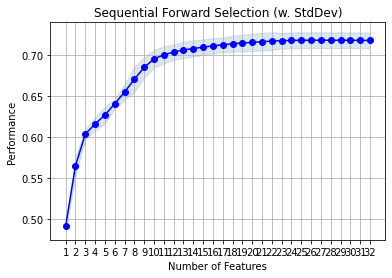

In [42]:
fig = plot_sfs(features.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [43]:
features.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_5',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13')

Now let's try it again with 'floating' = True. 

In [44]:
feature_selector_true = SequentialFeatureSelector(LinearRegression(n_jobs=-1),
           k_features='best',
           forward=True,
           floating = True,
           verbose=2,
           scoring='r2',
           cv=4)

In [45]:
features_true = feature_selector.fit(df_concat.drop(['price'],axis=1), df_concat['price'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2022-04-26 16:44:59] Features: 1/32 -- score: 0.4919732280872655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2022-04-26 16:45:00] Features: 2/32 -- score: 0.5652686413157129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2022-04-26 16:45:01] Features: 3/32 -- score: 0.6040774071911087[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2022-04-26 16:45:18] Features: 28/32 -- score: 0.71833704822815[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2022-04-26 16:45:18] Features: 29/32 -- score: 0.7183180113971643[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished

[2022-04-26 16:45:19] Features: 30/32 -- score: 0.718284153395921[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2022-04-26 16:45:19] Features: 31/32 

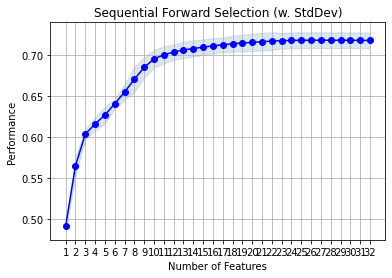

In [46]:
fig = plot_sfs(features_true.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [47]:
features_true.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_5',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13')

#### Step Backwards

In [48]:
feature_selector_backwards = SequentialFeatureSelector(LinearRegression(n_jobs=-1),
           k_features='best',
           forward=False,
           verbose=2,
           scoring='r2',
           cv=4)

In [49]:
features_backwards = feature_selector_backwards.fit(df_concat.drop(['price'],axis=1), df_concat['price'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    3.8s finished

[2022-04-26 16:45:23] Features: 31/1 -- score: 0.718186305642265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.7s finished

[2022-04-26 16:45:26] Features: 30/1 -- score: 0.7182151093316559[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.7s finished

[2022-04-26 16:45:29] Features: 29/1 -- score: 0.7182217818746524[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

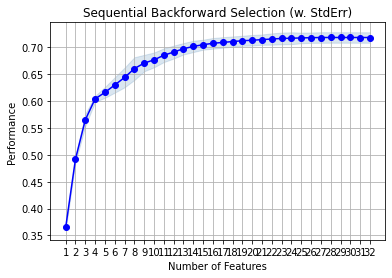

In [50]:
fig = plot_sfs(features_backwards.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backforward Selection (w. StdErr)')
plt.grid()
plt.show()

In [51]:
features_backwards.k_score_

0.718221781874667

In [52]:
features_backwards.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13')

Now let's try it again with 'floating' = True. 

In [53]:
feature_selector_backwards_true = SequentialFeatureSelector(LinearRegression(n_jobs=-1),
           k_features='best',
           forward=False,
           floating = True,
           verbose=2,
           scoring='r2',
           cv=4)

In [54]:
features_backwards_true = feature_selector_backwards_true.fit(df_concat.drop(['price'],axis=1), df_concat['price'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.8s finished

[2022-04-26 16:45:57] Features: 31/1 -- score: 0.718186305642265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2022-04-26 16:45:59] Features: 30/1 -- score: 0.7182151093316559[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_job

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Paral

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Paral

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.1s finished

[2022-04-26 16:47:27] Features: 17/1 -- score: 0.7112605267711838[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished

[2022-04-26 16:47:57] Features: 8/1 -- score: 0.6603447275300351[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2022-04-26 16:47:58] Features: 7/1 -- score: 0.6438580945783117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

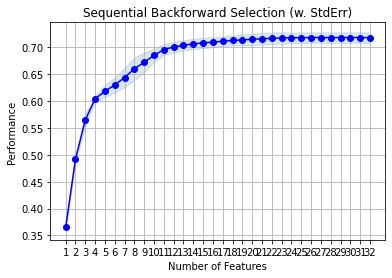

In [55]:
fig = plot_sfs(features_backwards_true.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backforward Selection (w. StdErr)')
plt.grid()
plt.show()

In [56]:
features_backwards_true.k_score_

0.7182230122138209

In [57]:
features_backwards_true.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_4',
 'condition_5',
 'grade_5',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13')

#### Recursive Feature Elimination

In [58]:
from sklearn.feature_selection import RFE

In [59]:
rfe = RFE(estimator=LinearRegression(n_jobs=-1), n_features_to_select=20)
# fit RFE
rfe.fit(df_concat.drop(['price'],axis=1), df_concat['price'])
# summarize all features
for i in range(df_concat.drop(['price'],axis=1).shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 7.000
Column: 3, Selected False, Rank: 13.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected False, Rank: 9.000
Column: 7, Selected False, Rank: 5.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected False, Rank: 12.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 2.000
Column: 19, Selected False, Rank: 4.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selecte

In [60]:
for i in range(1,len(df_concat.columns)+1):
    rfe = RFE(estimator=LinearRegression(n_jobs=-1), n_features_to_select= i)
    # fit RFE
    rfe.fit(df_concat.drop(['price'],axis=1), df_concat['price'])
    # summarize all features
    Columns = []
    for column in range(df_concat.drop(['price'],axis=1).shape[1]):
        if rfe.support_[column] ==  True:
            Columns.append(column)
    print(f"Score: {round(rfe.score(df_concat.drop(['price'],axis=1), df_concat['price']),3)} Columns: {Columns} ")

Score: 0.045 Columns: [31] 
Score: 0.13 Columns: [30, 31] 
Score: 0.26 Columns: [29, 30, 31] 
Score: 0.308 Columns: [13, 29, 30, 31] 
Score: 0.391 Columns: [9, 13, 29, 30, 31] 
Score: 0.502 Columns: [9, 13, 28, 29, 30, 31] 
Score: 0.512 Columns: [9, 13, 17, 28, 29, 30, 31] 
Score: 0.588 Columns: [9, 13, 17, 27, 28, 29, 30, 31] 
Score: 0.596 Columns: [9, 13, 16, 17, 27, 28, 29, 30, 31] 
Score: 0.601 Columns: [9, 13, 14, 16, 17, 27, 28, 29, 30, 31] 
Score: 0.609 Columns: [9, 13, 14, 15, 16, 17, 27, 28, 29, 30, 31] 
Score: 0.648 Columns: [1, 9, 13, 14, 15, 16, 17, 27, 28, 29, 30, 31] 
Score: 0.654 Columns: [1, 9, 13, 14, 15, 16, 17, 21, 27, 28, 29, 30, 31] 
Score: 0.655 Columns: [1, 9, 13, 14, 15, 16, 17, 21, 23, 27, 28, 29, 30, 31] 
Score: 0.655 Columns: [1, 9, 13, 14, 15, 16, 17, 21, 22, 23, 27, 28, 29, 30, 31] 
Score: 0.657 Columns: [1, 9, 13, 14, 15, 16, 17, 21, 22, 23, 24, 27, 28, 29, 30, 31] 
Score: 0.663 Columns: [1, 9, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31] 
S

#### Select K Best

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(df_concat.drop(['price'],axis=1), df_concat['price'])
# transform train input data
X_features_fs = fs.transform(df_concat.drop(['price'],axis=1))

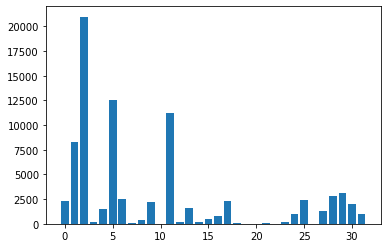

In [62]:
# what are scores for the features
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [63]:
fs.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.51100045e-040,
       2.37151510e-322, 0.00000000e+000, 0.00000000e+000, 2.04276573e-015,
       1.22566308e-077, 0.00000000e+000, 1.16696892e-003, 0.00000000e+000,
       3.35133561e-034, 0.00000000e+000, 2.41023935e-042, 1.84121916e-106,
       8.39503161e-162, 0.00000000e+000, 3.86541866e-014, 3.04406783e-001,
       6.02374623e-006, 2.69874449e-017, 3.33491837e-006, 1.38349017e-035,
       8.34908357e-213, 0.00000000e+000, 4.92945999e-001, 8.34347582e-271,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.09495288e-217])

In [64]:
p_values_list = fs.pvalues_.tolist()
for index, value in enumerate(p_values_list):
    if value > 0.05:
        print(df_concat.columns[index])

condition_2
grade_7


### Embedded Methods

The typical steps for embedded methods involve training a machine learning algorithm using all the features, then deriving the importance of those features according to the algorithm used.  Afterward, it can remove unimportant features based on some criteria specific to the algorithm.

#### LASSO (L1 Regularization)

Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.

For this method, we need to use a scaled dataset before penalize each coefficient.

In [65]:
y = df_concat['price']
y = y.reset_index()
y = y.drop('index', axis=1)

In [66]:
df_categorical_features = df_concat.drop(['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'], axis=1)
df_scaled_features = df_concat[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]

model = StandardScaler()
x_scaled_features = model.fit_transform(df_scaled_features)
df_scaled_features = pd.DataFrame(x_scaled_features, columns = df_scaled_features.columns)

df_categorical_features = df_categorical_features.reset_index()
df_categorical_features = df_categorical_features.drop('index', axis=1)

df_scaled_dataset = pd.concat([df_scaled_features, df_categorical_features], axis=1)

In [67]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import numpy as np

alphas = 10**np.linspace(5,-1,32)*0.5
list_cof = []

for alpha_value in alphas:
    clf = Lasso(alpha=alpha_value, normalize = False, max_iter=100000)
    clf.fit(df_scaled_dataset, y)
    list_cof.append(clf.coef_)

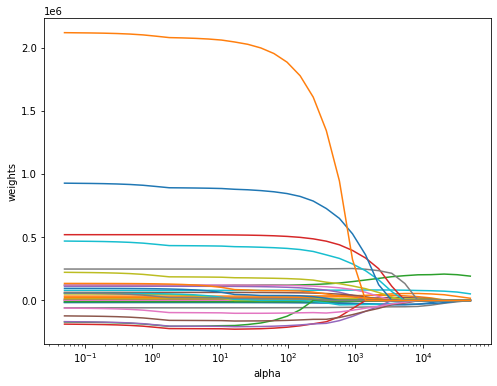

In [68]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(alphas, list_cof)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

## Model Selection

### Linear Regression

For Linear Regression, let's use **df_no_vifinf** dataset, which is the dataframe with no id, date and zipcode features and no infinite VIF score (no sqft_living feature).

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_no_vifinf.drop(['price'],axis=1), df_no_vifinf['price'], test_size=0.30, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
r2_train = r2_score(y_train,y_train_predict)
mae_train = mean_absolute_error(y_train,y_train_predict)

print(f"R^2 (Train): {round(r2_train,4)}, MAE (Train): $ {round(mae_train,2)}")

R^2 (Train): 0.7365, MAE (Train): $ 119237.01


In [71]:
y_test_predict = model.predict(X_test)
r2_test = r2_score(y_test,y_test_predict)
mae_train = mean_absolute_error(y_test,y_test_predict)

print(f"R^2 (Test): {round(r2_test,4)}, MAE (Test): $ {round(mae_train,2)}")

R^2 (Test): 0.6998, MAE (Test): $ 120226.63


### Polynomial Regression

In this case, we will also use **df_no_vifinf** dataset.

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

for k in range(1,4):
    
    X = df_concat_no_vifscalled.drop(columns = 'price')
    y = df_concat_no_vifscalled['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # polynomial k degree
    poly_reg = PolynomialFeatures(degree=k)
    
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    
    train_pred = lin_reg.predict(X_train_poly)
    test_pred = lin_reg.predict(X_test_poly)
    
    r2_train = r2_score(y_train,train_pred)
    mae_train = mean_absolute_error(y_train,train_pred)
    
    r2_test = r2_score(y_test,test_pred)
    mae_test = mean_absolute_error(y_test,test_pred)
    
    print(f"k = {k}, R^2 (Train): {round(r2_train,4)}, MAE (Train): $ {round(mae_train,2)}")
    print(f"k = {k}, R^2 (Test): {round(r2_test,4)}, MAE (Test): $ {round(mae_test,2)}")

k = 1, R^2 (Train): 0.7365, MAE (Train): $ 119215.69
k = 1, R^2 (Test): 0.6998, MAE (Test): $ 120210.57
k = 2, R^2 (Train): 0.8438, MAE (Train): $ 96155.45
k = 2, R^2 (Test): -14.881, MAE (Test): $ 145413.52
k = 3, R^2 (Train): 0.892, MAE (Train): $ 84321.46
k = 3, R^2 (Test): -239.1971, MAE (Test): $ 283201.22


In [116]:
df_concat

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,...,0,0,0,0,1,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,...,0,0,0,0,1,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,...,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,...,0,0,0,0,1,0,0,0,0,0


### Ridge, Lasso Regression and Elastic Net

In [113]:
X

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,...,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_10,grade_11,grade_12,grade_13
0,-0.402903,-1.451073,-0.228182,-0.915552,-0.735251,-0.659031,-0.544678,-0.210210,-0.352894,-0.305695,...,0,0,0,0,1,0,0,0,0,0
1,-0.402903,0.174486,-0.189739,0.937431,0.460776,0.244602,-0.680850,4.744842,1.161376,-0.746286,...,0,0,0,0,1,0,0,0,0,0
2,-1.482493,-1.451073,-0.123139,-0.915552,-1.230575,-0.659031,-1.293626,-0.210210,1.283355,-0.135144,...,0,0,0,1,0,0,0,0,0,0
3,0.676687,1.149821,-0.243878,-0.915552,-0.892305,1.396734,-0.204247,-0.210210,-0.283604,-1.272151,...,1,0,0,0,1,0,0,0,0,0
4,-0.402903,-0.150626,-0.169503,-0.915552,-0.131197,-0.659031,0.544700,-0.210210,0.409293,1.200840,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.402903,0.499597,-0.337306,2.790414,-0.312413,-0.659031,1.293648,-0.210210,1.004752,-0.938156,...,0,0,0,0,0,1,0,0,0,0
21593,0.676687,0.499597,-0.224246,0.937431,0.629911,-0.659031,1.463863,-0.210210,-0.356503,-1.051856,...,0,0,0,0,0,1,0,0,0,0
21594,-1.482493,-1.776184,-0.332018,0.937431,-0.928548,-0.659031,1.293648,-0.210210,0.247617,-0.604160,...,0,0,0,0,1,0,0,0,0,0
21595,-0.402903,0.499597,-0.306952,0.937431,-0.227845,-0.659031,1.123432,-0.210210,-0.184722,1.030289,...,0,0,0,0,0,1,0,0,0,0


### Support Vector Regression (SVR)

### Decision Tree

In [ ]:
X = df.drop(columns=['price','id','zipcode','date'])
y = df['price']

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

cv_results['test_score'].mean()

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

# df_concat dataset with "one hot enconding", no scalling features and no other changes except id, date and zip dropped features
X_train, X_test, y_train, y_test = train_test_split(df_concat.drop(['price'],axis=1), df_concat['price'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)

cv_results = cross_validate(forest, X_train, y_train, scoring = "r2", cv=5)
cv_results['test_score'].mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df_concat.drop(['price'],axis=1), df_concat['price'], test_size=0.30, random_state=42)

score_test_values = []
score_train_values = []
k_values = []

for k in range(1,len(df_concat.columns)):
    
    X_train, X_test, y_train, y_test = train_test_split(df_concat.drop(['price'],axis=1), df_concat['price'], test_size=0.30, random_state=42)
    k = k
    selector = SelectKBest(score_func=f_regression, k=k)
    xtrain2 = selector.fit_transform(X_train, y_train)
    xtest2 = selector.transform(X_test)

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtrain2, y_train)
    
    p = mdl.predict(xtest2)
    p2 = mdl.predict(xtrain2)

    score_test = r2_score(y_test,p)
    score_test_values.append(score_test)
    score_train = r2_score(y_train,p2)
    score_train_values.append(score_train)
    k_values.append(k)

plt.plot(k_values,score_test_values)
plt.plot(k_values,score_train_values)
plt.legend(['Test','Train'])
plt.xlabel('K (Number of columns)')
plt.ylabel('R2 Score')
plt.title('R2 by K (Number of Columns)')
plt.show()

### XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_concat.drop(['price'],axis=1), df_concat['price'], test_size=0.30, random_state=42)

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(),
    n_estimators=100)

cv_results = cross_validate(adaboost, X_train, y_train, scoring = "r2", cv=5)

cv_results['test_score'].mean()

### KNN Regression

In [ ]:
X_t = df.drop(['price','date','id'],axis = 1)
y_t = df['price']

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=18)
# apply feature selection
X_selected = fs.fit_transform(X_t, y_t)
print(X_selected)

In [ ]:
X_selected.shape

In [ ]:
fs.pvalues_

In [ ]:
fs.get_params()

In [ ]:
fs.scores_